In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import seaborn as sns
sns.set(style="whitegrid", palette="Set2")
palette = sns.color_palette("Set2")


###  1.1 Greedy with non-optimistic values (Incremental implementation of simple average method)

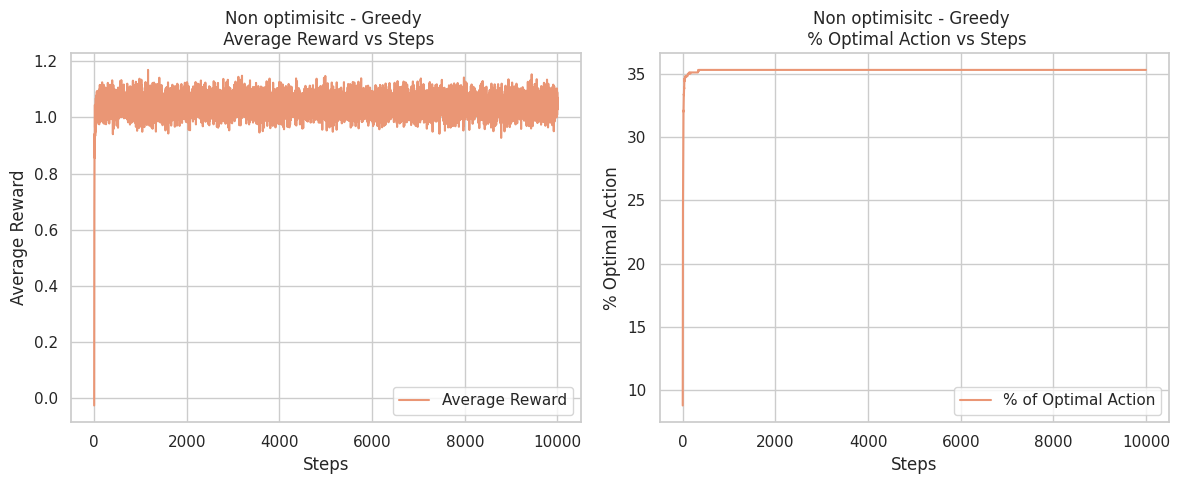

In [3]:
def greedy_non_optimistic(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list):
    action_count = np.zeros((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0

        for problem_index in range(bandit_problems):
            maxval = np.amax(reward_estimates[problem_index]) # find the maximum value of the reward for that problem.
            maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval)) #gets the index of that reward in the problem
            random_choice = np.random.choice(maxval_indices)  #in situatuin where there are multiple rewards with the same value
            #: Randomly selects one index from the list of indices with the highest estimated reward. This breaks the tie randomly among the levers that have the same highest estimated reward.

            # Generating reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    global_reward_list.append(avg_rewards_per_step)
    global_optimal_action_list.append(optimal_action_count)
    return

steps = 10000
bandit_problems = 1000
n_actions = 10

testbed = np.random.normal(0, 1, (bandit_problems, n_actions))

global_reward_list = []
global_optimal_action_list = []

greedy_non_optimistic(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list)

# Average reward at each time step
average_reward_across_runs = np.mean(global_reward_list, axis=0)

# Percentage of time the optimal action is taken
optimal_action_percentage = np.mean(global_optimal_action_list, axis=0) * 100

plt.figure(figsize=(12, 5))

# Plot average reward
plt.subplot(1, 2, 1)
sns.lineplot(data=average_reward_across_runs, label='Average Reward',color= '#ea9675')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Non optimisitc - Greedy \n Average Reward vs Steps')
plt.legend()

# Plot % of optimal action
plt.subplot(1, 2, 2)
sns.lineplot(data=optimal_action_percentage, label='% of Optimal Action',color='#ea9675')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Non optimisitc - Greedy \n % Optimal Action vs Steps')
plt.legend()

plt.tight_layout()
plt.show()

###  1.2 Epsilon Greedy with different choices of epsilon

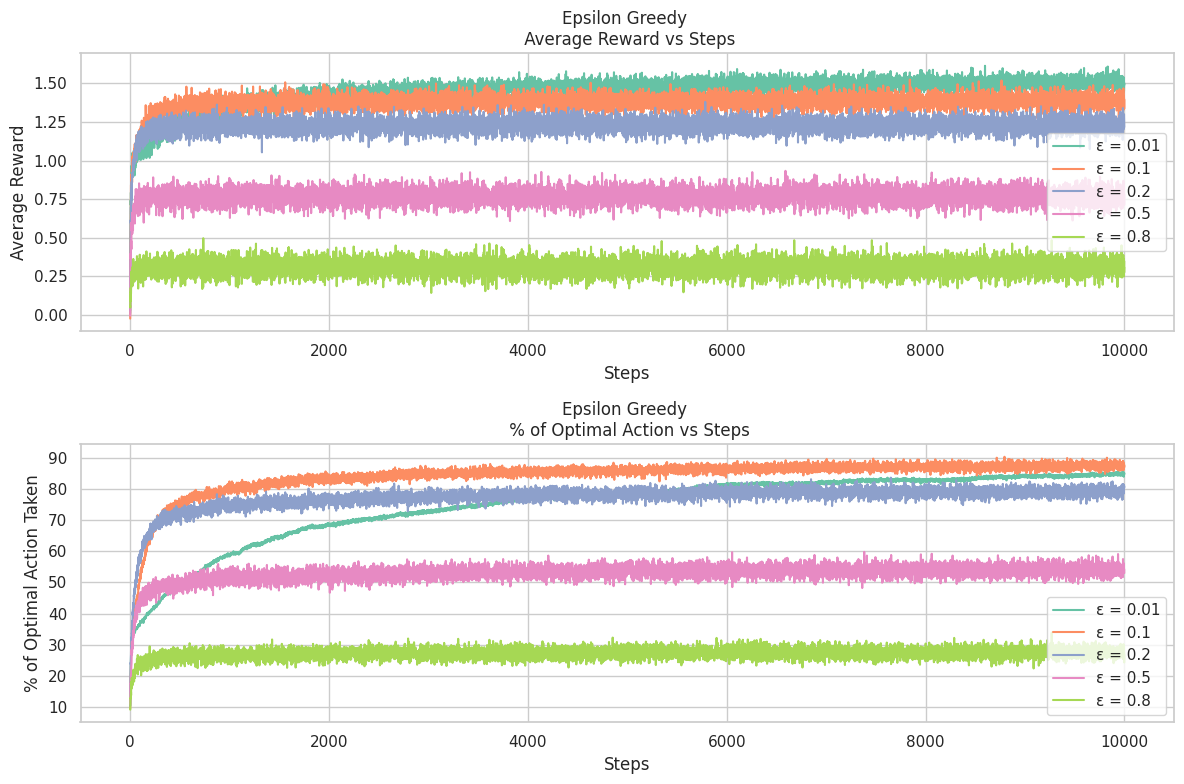

In [8]:
def epsilon_greedy(steps, bandit_problems, n_actions, testbed, epsilon):
    action_count = np.zeros((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions))  # initial reward estimates set to zero
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)


    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0

        for problem_index in range(bandit_problems):
            var_random = random.random()
            if (var_random > epsilon):
                maxval = np.amax(reward_estimates[problem_index]) # find the maximum value of the reward for that problem.
                maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval)) #gets the index of that reward in the problem
                random_choice = np.random.choice(maxval_indices)  #in situatuin where there are multiple rewards with the same value
                # Randomly selects one index from the list of indices with the highest estimated reward.
            else:
                random_choice = np.random.randint(n_actions)

            # Generate reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]


            # Update reward estimate
            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    return avg_rewards_per_step, optimal_action_count

steps = 10000
bandit_problems = 1000
n_actions = 10
epsilon_values = [0.01, 0.1, 0.2, 0.5,0.8]  # 5 different epsilon values

testbed = np.random.normal(0, 1, (bandit_problems, n_actions))

# To store results
all_avg_rewards = []
all_optimal_action_percentages = []

for epsilon in epsilon_values:
    avg_rewards_per_step, optimal_action_count = epsilon_greedy(steps, bandit_problems, n_actions, testbed, epsilon)
    all_avg_rewards.append(avg_rewards_per_step)
    all_optimal_action_percentages.append(optimal_action_count * 100)

plt.figure(figsize=(12, 8))

# Plotting the average reward
plt.subplot(2, 1, 1)
for i, epsilon in enumerate(epsilon_values):
    sns.lineplot(x=range(len(all_avg_rewards[i])), y=all_avg_rewards[i], label=f'ε = {epsilon}', color=palette[i % len(palette)])
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Epsilon Greedy \n Average Reward vs Steps')
plt.legend()

# Plot percentage of optimal action
plt.subplot(2, 1, 2)
for i, epsilon in enumerate(epsilon_values):
    sns.lineplot(x=range(len(all_optimal_action_percentages[i])), y=all_optimal_action_percentages[i], label=f'ε = {epsilon}', color=palette[i % len(palette)])
plt.xlabel('Steps')
plt.ylabel('% of Optimal Action Taken')
plt.title('Epsilon Greedy \n % of Optimal Action vs Steps')
plt.legend()

plt.tight_layout()
plt.show()

### 1.3 Optimistic starting values with a greedy approach

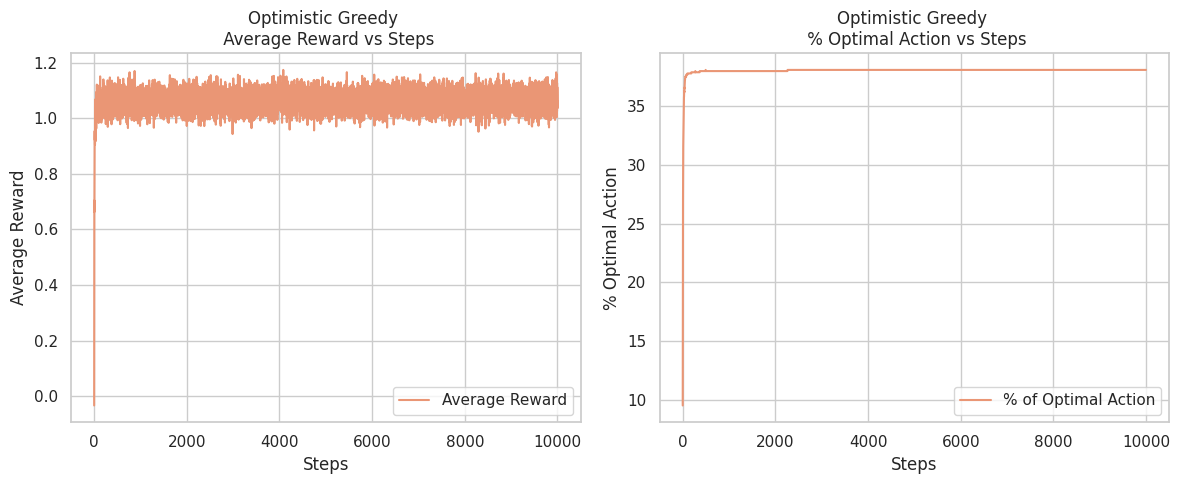

In [5]:
def greedy_optimistic(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list):
    action_count = np.zeros((bandit_problems, n_actions))
    reward_estimates = np.zeros((bandit_problems, n_actions)) * 5
    avg_rewards_per_step = []
    optimal_action_count = np.zeros(steps)

    for step in range(steps):
        reward_sum_over_all_bandits_per_step = 0
        optimal_action_chosen_count = 0

        for problem_index in range(bandit_problems):
            maxval = np.amax(reward_estimates[problem_index]) # find the maximum value of the reward for that problem.
            maxval_indices = np.ravel(np.where(reward_estimates[problem_index] == maxval)) #gets the index of that reward in the problem
            random_choice = np.random.choice(maxval_indices)  #in situatuin where there are multiple rewards with the same value
            #: Randomly selects one index from the list of indices with the highest estimated reward. This breaks the tie randomly among the levers that have the same highest estimated reward.

            # Generating reward from the testbed
            Rn = np.random.normal(testbed[problem_index][random_choice], 1)
            action_count[problem_index][random_choice] += 1
            n = action_count[problem_index][random_choice]

            reward_estimates[problem_index][random_choice] = reward_estimates[problem_index][random_choice] + (Rn - reward_estimates[problem_index][random_choice]) / n

            reward_sum_over_all_bandits_per_step += Rn

            # Check if the optimal action was chosen
            optimal_action = np.argmax(testbed[problem_index])
            if random_choice == optimal_action:
                optimal_action_chosen_count += 1

        avg_rewards_per_step.append(reward_sum_over_all_bandits_per_step / bandit_problems)
        optimal_action_count[step] = optimal_action_chosen_count / bandit_problems

    global_reward_list.append(avg_rewards_per_step)
    global_optimal_action_list.append(optimal_action_count)
    return

steps = 10000
bandit_problems = 1000
n_actions = 10

testbed = np.random.normal(0, 1, (bandit_problems, n_actions))

global_reward_list = []
global_optimal_action_list = []

greedy_optimistic(steps, bandit_problems, n_actions, testbed, global_reward_list, global_optimal_action_list)

# Average reward at each time step
average_reward_across_runs = np.mean(global_reward_list, axis=0)

# Percentage of time the optimal action is taken
optimal_action_percentage = np.mean(global_optimal_action_list, axis=0) * 100

plt.figure(figsize=(12, 5))

# Plot average reward
plt.subplot(1, 2, 1)
sns.lineplot(data=average_reward_across_runs, label='Average Reward',color= '#ea9675')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Optimistic Greedy \n Average Reward vs Steps')
plt.legend()

# Plot % of optimal action
plt.subplot(1, 2, 2)
sns.lineplot(data=optimal_action_percentage, label='% of Optimal Action',color='#ea9675')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.title('Optimistic Greedy \n % Optimal Action vs Steps')
plt.legend()

plt.tight_layout()
plt.show()

###  1.4 Gradient Bandit Algorithm (Different Learning rates)

Running gradient_bandit learning rate=0.01
Running gradient_bandit learning rate=0.1
Running gradient_bandit learning rate=0.5


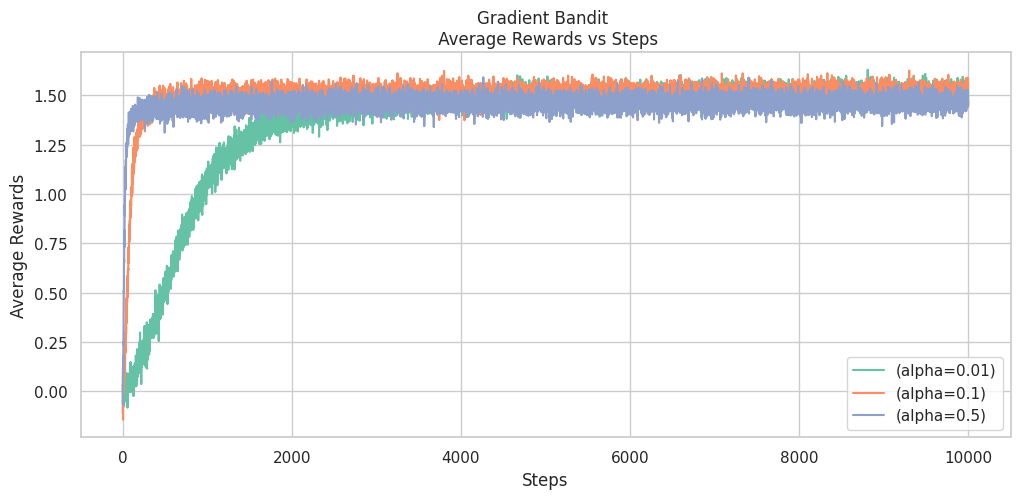

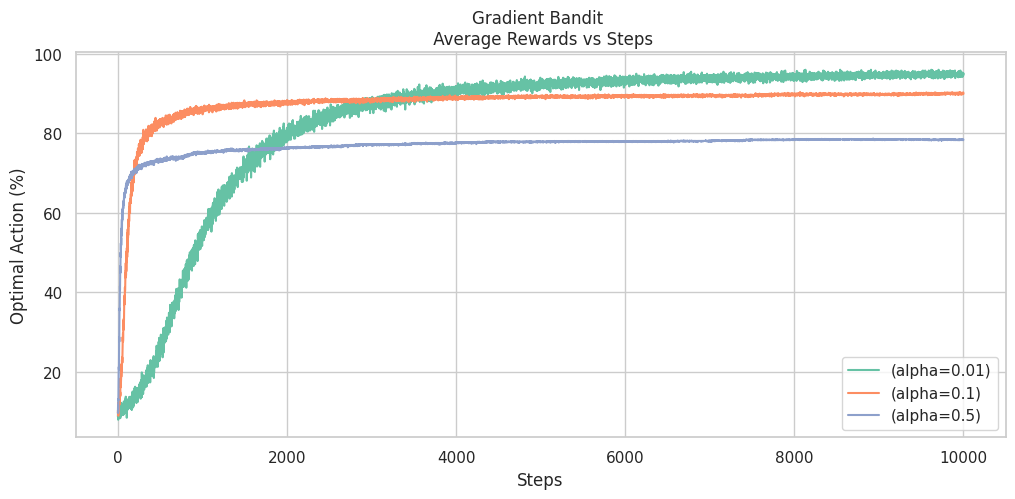

In [7]:
# Function for softmax distribution
def softmax_distribution(preference_estimates):
    maxval = np.amax(preference_estimates)
    exps = np.exp(preference_estimates - maxval)  # Using property of softmax function
    probabilities = exps / np.sum(exps, axis=0)
    return probabilities

# Gradient Bandit Algorithm
def gradient_bandit(steps, bandit_problems, n_actions, alpha,
                    testbed, global_average_reward_list, optimal_choice_list):

    action_count = np.zeros((bandit_problems, n_actions))
    Ravg = np.zeros((bandit_problems, n_actions))  # avg_reward_estimates
    Hpref = np.zeros((bandit_problems, n_actions))  # preference_estimates
    pr_action_t = np.zeros((bandit_problems, n_actions))  # probability of action a at time t

    optimal_choice_per_step = []
    mean_reward = 0
    rewards = np.zeros((steps, bandit_problems))
    for step in range(steps):
        sum_of_optimal_choice = 0
        avg_reward = []
        # Loop through all problems
        for b in range(bandit_problems):
            # calculating the probability of actions based on their preference
            pr_action_t[b] = softmax_distribution(Hpref[b])
            # choosing a random action from n_actions(possible action) according to their probabilities
            A = np.random.choice(np.arange(n_actions), p=pr_action_t[b])

            # np.arg max will return the index of the maximum value of the problem bandit from testbed and compare it with A (action NOT reward)
            if A == np.argmax(testbed[b]):
                # Add 1 if the condition is true
                sum_of_optimal_choice += 1
            # Calculate the reward based on testbed[problem][action]
            Rn = np.random.normal(testbed[b][A], 1)
            rewards[step,b] = Rn

            n = step + 1
            mean_reward = (Rn + (n - 1) * mean_reward) / n

            Hpref[b][:A] -= alpha * (Rn - mean_reward) * pr_action_t[b][:A] #updates for action 0 to A-1
            # if the value of the current reward is higher than the mean value, then the preference estimates for the actions before them will DECREASRE and otherwise it will increase.
            Hpref[b][A + 1:] -= alpha * (Rn - mean_reward) * pr_action_t[b][A + 1:] #updates actions for A+1 onwards
            #same as above.
            Hpref[b][A] += alpha * (Rn - mean_reward) * (1 - pr_action_t[b][A]) #updates action A only

        #Calculates the percentage of hoosing optimal action in each step for every bandit problem
        optimal_choice_per_step.append((sum_of_optimal_choice / bandit_problems) * 100)
    # Appends all of the optimal percentage choices for all steps to global_reward_list
    optimal_choice_list.append(optimal_choice_per_step) # returned for the second plot

    average_rewards = np.mean(rewards,axis = 1)
    global_average_reward_list.append(average_rewards) # returned for the first plot
    return

steps = 10000
bandit_problems = 1000
n_actions = 10
initial_reward_estimates = np.zeros((bandit_problems, n_actions))
testbed = np.random.normal(0, 1, (bandit_problems, n_actions))
optimal_choice_list = []
global_average_reward_list = []
learning_rates = [0.01,0.1,0.5]  # n_actions values

for alpha in learning_rates:

    print(f"Running gradient_bandit learning rate={alpha}")
    gradient_bandit(steps, bandit_problems, n_actions, alpha,testbed, global_average_reward_list, optimal_choice_list)

plt.figure(figsize=(12, 5))

# Plot average global rewards
for i, alpha in enumerate(learning_rates):
    label = f'(alpha={alpha})'
    sns.lineplot(x=range(len(global_average_reward_list[i])), y=global_average_reward_list[i], label=label, color=palette[i % len(palette)])
plt.xlabel('Steps')
plt.ylabel('Average Rewards')
plt.legend()
plt.title('Gradient Bandit \n Average Rewards vs Steps')
plt.show()

# Create a new figure for optimal action percentage
plt.figure(figsize=(12, 5))

# Plot optimal action percentage
for i, alpha in enumerate(learning_rates):
    label = f'(alpha={alpha})'
    sns.lineplot(x=range(len(optimal_choice_list[i])), y=optimal_choice_list[i], label=label, color=palette[i % len(palette)])
plt.xlabel('Steps')
plt.ylabel('Optimal Action (%)')
plt.legend()
plt.title('Gradient Bandit \n Average Rewards vs Steps')
plt.show()